In [1]:
import tweepy
import pickle
import re
import nltk
import pandas as pd

In [2]:
df = pd.read_csv("chuvas_jp_2123-08.csv", usecols=[1,2,3,4])

In [3]:
df.head()

,horario,local,texto,relevancia
0,2020-08-22 20:57:12,"João Pessoa, Brasil",@qbrunito Se você perceber os jurados todos es...,0
1,2020-08-22 20:13:07,"João Pessoa, Brasil",Tudo que eu queria agora era uma chuva beeeeee...,0
2,2020-08-22 20:01:39,João Pessoa - PB,@JapaArtes @CorreiosBR @jairbolsonaro Essa mer...,0
3,2020-08-22 16:53:34,"João Pessoa, Brazil",E ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...,0
4,2020-08-22 16:26:59,"João Pessoa, Brasil","@xicosa @fabi2moraes Foi chuva, mas essa chuva...",0


In [4]:
df['Sigla'] = 'JP'
df.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:57:12,"João Pessoa, Brasil",@qbrunito Se você perceber os jurados todos es...,0,JP
1,2020-08-22 20:13:07,"João Pessoa, Brasil",Tudo que eu queria agora era uma chuva beeeeee...,0,JP
2,2020-08-22 20:01:39,João Pessoa - PB,@JapaArtes @CorreiosBR @jairbolsonaro Essa mer...,0,JP
3,2020-08-22 16:53:34,"João Pessoa, Brazil",E ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...,0,JP
4,2020-08-22 16:26:59,"João Pessoa, Brasil","@xicosa @fabi2moraes Foi chuva, mas essa chuva...",0,JP


In [7]:
df_al = pd.read_csv('chuvas_al_1822-08.csv', usecols=[1,2,3,4])

In [8]:
df_al.head()

,horario,local,texto,relevancia
0,2020-08-22 19:53:38,Alagoas,@Enaldinho1 @uselolja @QGDoEnaldinho Chuva #MP...,0
1,2020-08-22 18:30:26,𝒂𝒕𝒂𝒍𝒂𝒊𝒂,"""– Hayden. O nome dele será Hayden.""\n(Chuva -...",0
2,2020-08-22 18:16:59,𝒂𝒕𝒂𝒍𝒂𝒊𝒂,Ainda tô no prólogo de Chuva e já senti vontad...,0
3,2020-08-22 18:16:13,𝒂𝒕𝒂𝒍𝒂𝒊𝒂,"""Ela soluçava ruidosamente. Era um choro parti...",0
4,2020-08-22 17:49:46,𝒂𝒕𝒂𝒍𝒂𝒊𝒂,"""A chuva estava quase chegando.""\n(Chuva - Liv...",0


In [9]:
df_al['Sigla'] = 'AL'

In [10]:
df_final = pd.concat([df,df_al])

In [11]:
df_final

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:57:12,"João Pessoa, Brasil",@qbrunito Se você perceber os jurados todos es...,0,JP
1,2020-08-22 20:13:07,"João Pessoa, Brasil",Tudo que eu queria agora era uma chuva beeeeee...,0,JP
2,2020-08-22 20:01:39,João Pessoa - PB,@JapaArtes @CorreiosBR @jairbolsonaro Essa mer...,0,JP
3,2020-08-22 16:53:34,"João Pessoa, Brazil",E ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...,0,JP
4,2020-08-22 16:26:59,"João Pessoa, Brasil","@xicosa @fabi2moraes Foi chuva, mas essa chuva...",0,JP
...,...,...,...,...,...
95,2020-08-18 14:59:36,"Maceió, Brasil",eu odeio n ter condições de criar outro cachor...,0,AL
96,2020-08-18 12:34:05,Alagoas🌵,Chuva de arroz??? https://t.co/3RhcvW0M4h,0,AL
97,2020-08-18 09:57:46,"Maceió, Brasil",@lenycatia @ThRod @correio Imagina 57mil pesso...,0,AL
98,2020-08-18 09:43:29,"Alagoas, Brazil",a chuva da vitoria vai reinar no fim 🌈🌈🌈🌈🌈🌈🌈🌈,0,AL


In [12]:
df_am = pd.read_csv('chuvas_am_22-08.csv', usecols=[1,2,3,4])

In [13]:
df_am['Sigla'] = 'AM'

In [14]:
df_am.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:48:03,"Manaus, Brasil","RT @cigarctic: ventou, ventou, ventou e nenhum...",0,AM
1,2020-08-22 20:39:24,NaN,RT @vitrrhugo: quando chove em manaus https://...,0,AM
2,2020-08-22 20:38:49,"Manaus, Brasil",@tiagotheworld Amo q ela levou chuva de unf ma...,0,AM
3,2020-08-22 20:03:03,"Manaus, Brasil",@dunburnt Pior que eu fui olhar agora e tá com...,0,AM
4,2020-08-22 19:46:21,Manaus,RT @vitrrhugo: quando chove em manaus https://...,0,AM


In [15]:
df_final = pd.concat([df_final, df_am])
df_final['Sigla'].value_counts()

JP    100
AL    100
AM    100
Name: Sigla, dtype: int64

In [16]:
df_ba= pd.read_csv('chuvas_ba_2021-08.csv', usecols=[1,2,3,4])

In [17]:
df_ba['Sigla'] = 'BA'

In [18]:
df_ba.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-21 20:57:24,salvador bahia,"@LuciaLo20914588 🤣🤣🤣 vdd!\nMorei em Belém, cho...",0,BA
1,2020-08-21 20:50:01,"Salvador, Brasil",Que conversa é essa que vcs querem neve aqui e...,0,BA
2,2020-08-21 20:34:33,Salvador,Toda vez que chove eu oro pedindo a Deus que p...,0,BA
3,2020-08-21 20:19:56,João Pessoa/PB,RT @jrmutti: @MarquinhosAssu2 @simpraisa Morei...,0,BA
4,2020-08-21 20:04:13,NaN,"RT @MarcilioJuniior: Sexta feira, frio do cara...",0,BA


In [19]:
df_final = pd.concat([df_final, df_ba])
df_final['Sigla'].value_counts()

BA    100
JP    100
AL    100
AM    100
Name: Sigla, dtype: int64

In [20]:
df_ce = pd.read_csv('chuvas_ce_22-08.csv', usecols=[1,2,3,4])

In [21]:
df_ce['Sigla'] = 'CE'

In [22]:
df_ce.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:58:44,"Fortaleza, Brasil",@jacksoncruz A chuva dos 200 espirros,0,CE
1,2020-08-22 20:44:18,Ceará,a unica certeza q tenho eh q qdo abrir o insta...,0,CE
2,2020-08-22 20:43:48,Ceará,@Marisaaloppes aproveita a chuva marisinha vc ...,0,CE
3,2020-08-22 20:29:17,"Ceará, Brazil",do nada uma chuva em sobral??,1,CE
4,2020-08-22 20:28:10,"Ceará, Brasil",CHUVA REAL EM SOBRAL EM AGOSTO PQP,1,CE


In [23]:
df_final = pd.concat([df_final, df_ce])
df_final['Sigla'].value_counts()

CE    100
BA    100
JP    100
AL    100
AM    100
Name: Sigla, dtype: int64

In [24]:
df_cg = pd.read_csv('chuvas_cg_1723-08.csv', usecols=[1,2,3,4])

In [25]:
df_cg['Sigla'] = 'CG'

In [26]:
df_cg.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 11:03:59,Campina Grande- Paraíba,"santa chuva é foda, triste dms",0,CG
1,2020-08-22 02:54:42,"Campina Grande, Brasil","@carlalarrat @loranmoreira_ eu quero chuva, co...",0,CG
2,2020-08-21 22:23:54,Campina Grande,@YagoCostat rapaz a brisa não pode ver chuva kkk,0,CG
3,2020-08-21 21:28:11,"Campina Grande, Brasil",E essa chuva ein??? 💢🖤\n\n#SuperLiveVascoTV,1,CG
4,2020-08-21 21:22:21,Campina Grande-Paraíba,"""Vou por a ""FOTO de minha CIDADE"" aqui pra vcs...",0,CG


In [27]:
df_final = pd.concat([df_final, df_cg])
df_final['Sigla'].value_counts()

CE    100
BA    100
JP    100
AL    100
AM    100
CG     33
Name: Sigla, dtype: int64

In [28]:
df_mt = pd.read_csv('chuvas_mt_2022-08.csv', usecols=[1,2,3,4])

In [29]:
df_mt['Sigla'] = 'MT'

In [30]:
df_mt.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:59:17,"Cuiabá, Brasil",RT @henricre: @bofumaporro so fumo maconha qua...,0,MT
1,2020-08-22 19:00:24,"Cuiabá, Brasil",@bofumaporro so fumo maconha quando chove e qu...,0,MT
2,2020-08-22 16:48:14,"Cuiabá, Brasil",bolinho de chuva eh tão bom,0,MT
3,2020-08-22 14:05:26,"Cuiabá, Brasil",eu no carnaval proucurando a leticia na porra ...,0,MT
4,2020-08-22 13:22:26,"Cuiabá, Brasil",Meu pai tá tão enjoado de fica em casa que na ...,0,MT


In [31]:
df_final = pd.concat([df_final, df_mt])
df_final['Sigla'].value_counts()

MT    100
CE    100
BA    100
JP    100
AL    100
AM    100
CG     33
Name: Sigla, dtype: int64

In [32]:
df_pa= pd.read_csv('chuvas_pa_22-08.csv', usecols=[1,2,3,4])

In [33]:
df_pa['Sigla'] = 'PA'

In [34]:
df_pa.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:52:33,"Belém, Brasil",RT @cassioffaial: Em Belém não chega nem a chu...,0,PA
1,2020-08-22 20:50:59,"Belém, Brasil",RT @cassioffaial: Em Belém não chega nem a chu...,0,PA
2,2020-08-22 20:50:27,"Pará, Brasil",A chuva de hoje foi tão boa❤❤,0,PA
3,2020-08-22 20:29:19,Belém,Ouvindo anunciação e lembrando dele\n\nchove c...,0,PA
4,2020-08-22 20:20:10,"Belém, Brasil",RT @cassioffaial: Em Belém não chega nem a chu...,0,PA


In [35]:
df_final = pd.concat([df_final, df_pa])
df_final['Sigla'].value_counts()

MT    100
CE    100
AL    100
AM    100
PA    100
BA    100
JP    100
CG     33
Name: Sigla, dtype: int64

In [36]:
df_pe = pd.read_csv('chuvas_pe_22-08.csv', usecols=[1,2,3,4])

In [37]:
df_pe['Sigla'] = 'PE'

In [38]:
df_pe.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:59:40,NaN,RT @LorranPhelipe: Como posso desejar chuva e ...,0,PE
1,2020-08-22 20:39:07,"Guanambi, Brasil",RT @LorranPhelipe: Como posso desejar chuva e ...,0,PE
2,2020-08-22 20:34:32,NaN,RT @LorranPhelipe: Como posso desejar chuva e ...,0,PE
3,2020-08-22 20:28:20,"Recife,PE",@TiagoAraujo___ Eu fui guerreira e fui na chuv...,0,PE
4,2020-08-22 20:18:40,"Recife, Brasil",Já silenciei os grupos do trabalho. Já comprei...,0,PE


In [39]:
df_final = pd.concat([df_final, df_pe])
df_final['Sigla'].value_counts()

MT    100
CE    100
AL    100
AM    100
PA    100
PE    100
BA    100
JP    100
CG     33
Name: Sigla, dtype: int64

In [40]:
df_rj= pd.read_csv('chuvas_rj_22-08.csv', usecols=[1,2,3,4])

In [41]:
df_rj['Sigla'] = 'RJ'

In [42]:
df_rj.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:59:10,"Rio de Janeiro, Brasil",eu quero a chuva que me prometeram,0,RJ
1,2020-08-22 20:58:52,"Cuiabá, Brasil",RT @guilhermesousa: Queria aqui agradecer ao j...,0,RJ
2,2020-08-22 20:58:41,NaN,RT @niquefds: Graças a Deus o tempo melhora am...,0,RJ
3,2020-08-22 20:58:10,Rio de Janeiro,Chuva chata do crlho 🤦‍♂️,1,RJ
4,2020-08-22 20:57:37,"Rio de Janeiro, Brasil",RT @djxande_: Pandemia + chuva = quem não tem ...,0,RJ


In [43]:
df_final = pd.concat([df_final, df_rj])
df_final['Sigla'].value_counts()

MT    100
CE    100
AL    100
AM    100
PA    100
PE    100
BA    100
JP    100
RJ    100
CG     33
Name: Sigla, dtype: int64

In [44]:
df_sp = pd.read_csv('chuvas_sp_21-08.csv', usecols=[1,2,3,4])

In [45]:
df_sp['Sigla'] = 'SP'

In [46]:
df_sp.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-21 20:59:35,Brasil,"RT @tricovotweets: Ontem, às 20h00, Paulinho B...",0,SP
1,2020-08-21 20:58:21,"São Paulo, Brasil",RT @barbaradzz: do que adianta essa friaca e e...,1,SP
2,2020-08-21 20:57:31,NaN,RT @rebs_rebeca: Esse tempo frio com chuva me ...,0,SP
3,2020-08-21 20:56:02,"São Bernardo do Campo, Brasil",@AmandaAlvesB_ Melhor pegar ônibus na chuva e ...,0,SP
4,2020-08-21 20:53:43,"São Paulo, Brasil","@goulart_lenita Aqui, litoral sul de sp, 9 gra...",1,SP


In [47]:
df_final = pd.concat([df_final, df_sp])
df_final['Sigla'].value_counts()

MT    100
CE    100
SP    100
AL    100
AM    100
PA    100
PE    100
BA    100
JP    100
RJ    100
CG     33
Name: Sigla, dtype: int64

In [49]:
df_final.to_csv('df_final.csv')

### __Análise__

In [53]:
df = pd.read_csv('df_final.csv', usecols=[1,2,3,4,5])
df.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:57:12,"João Pessoa, Brasil",@qbrunito Se você perceber os jurados todos es...,0,JP
1,2020-08-22 20:13:07,"João Pessoa, Brasil",Tudo que eu queria agora era uma chuva beeeeee...,0,JP
2,2020-08-22 20:01:39,João Pessoa - PB,@JapaArtes @CorreiosBR @jairbolsonaro Essa mer...,0,JP
3,2020-08-22 16:53:34,"João Pessoa, Brazil",E ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...,0,JP
4,2020-08-22 16:26:59,"João Pessoa, Brasil","@xicosa @fabi2moraes Foi chuva, mas essa chuva...",0,JP


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horario     1033 non-null   object
 1   local       946 non-null    object
 2   texto       1033 non-null   object
 3   relevancia  1033 non-null   int64 
 4   Sigla       1033 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.5+ KB


In [56]:
df.drop_duplicates('texto', keep='first', inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 1032
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horario     884 non-null    object
 1   local       844 non-null    object
 2   texto       884 non-null    object
 3   relevancia  884 non-null    int64 
 4   Sigla       884 non-null    object
dtypes: int64(1), object(4)
memory usage: 41.4+ KB


In [59]:
df['texto'][0:10]

0    @qbrunito Se você perceber os jurados todos es...
1    Tudo que eu queria agora era uma chuva beeeeee...
2    @JapaArtes @CorreiosBR @jairbolsonaro Essa mer...
3    E  ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...
4    @xicosa @fabi2moraes Foi chuva, mas essa chuva...
5    @amana_chuva Claro. E provavelmente vai sair t...
6                                   @amana_chuva Foda!
7                   @amana_chuva Véi esse disco ♥️♥️♥️
8       @tellmeylm Chuva THALITA MENEGHIM NO MULTISHOW
9    c meu prato de miojo c creme de leite depois d...
Name: texto, dtype: object

In [61]:
df['texto'][0:10].apply(print)

@qbrunito Se você perceber os jurados todos estão cantando músicas em Português e no primeiro dia o Jarbas tbm cantou o cantando na chuva na versão brasileira, então está muito mais para um reflexo sobre como é o público jovem de musicais, que acha que apenas em inglês is good
Tudo que eu queria agora era uma chuva beeeeeeeemmmmm forte pelo resto da noite.
@JapaArtes @CorreiosBR @jairbolsonaro Essa merda já era pra estar privatizada, serviço porco e caro, Sedex chega a custar mais caro a outros serviços e demora mais. Estraviam produtos, danificam, aqui em casa já jogaram a encomenda por cima do portão, certa vez pegou chuva molhou tudo. Privatiza tudo...
E  ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mostra evidências e fatos claros, mais eles ciscam e esperneiam, tentando invalidar isso com a "chuva de dislikes" - que mostra o quão ridículo e raso é o pensamento dessa gente
+
@xicosa @fabi2moraes Foi chuva, mas essa chuva não aconteceria se não fosse para salvar o Nordeste, há uma ideia

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: texto, dtype: object

In [493]:
#Limpando links e menções

import emoji
#tokenizer = nltk.load

def limpaString(strOriginal):
    
    limpaMencao = re.sub('@[A-Za-z0-9_]+', '', strOriginal) 
    limpaTags = re.sub('#', '', limpaMencao) 
    limpaLinks = re.sub('\w+:\/\/\S+','', limpaTags)
    limpaPontuacao = re.sub('[-.,;:!?_()*+="%$]+','',limpaLinks)
    limpaEmojis = emoji.get_emoji_regexp().sub('', limpaPontuacao)
    removeNumeros = re.sub('[0-9]', '', limpaEmojis)
    final = removeNumeros.lower()
    
    return final


In [494]:
strTeste = df['texto'][1]

In [495]:
strTeste

'Tudo que eu queria agora era uma chuva beeeeeeeemmmmm forte pelo resto da noite.'

In [496]:
strLimpa = limpaString(strTeste)
strLimpa

'tudo que eu queria agora era uma chuva beeeeeeeemmmmm forte pelo resto da noite'

In [497]:
df_limpo = df.copy()
df_limpo['texto'] = df_limpo['texto'].apply(limpaString) 

In [498]:
df_limpo.head()

,horario,local,texto,relevancia,Sigla
0,2020-08-22 20:57:12,"João Pessoa, Brasil",se você perceber os jurados todos estão canta...,0,JP
1,2020-08-22 20:13:07,"João Pessoa, Brasil",tudo que eu queria agora era uma chuva beeeeee...,0,JP
2,2020-08-22 20:01:39,João Pessoa - PB,essa merda já era pra estar privatizada ser...,0,JP
3,2020-08-22 16:53:34,"João Pessoa, Brazil",e ̶p̶a̶r̶e̶c̶e̶ ̶q̶u̶e̶ ̶ quanto mais você mo...,0,JP
4,2020-08-22 16:26:59,"João Pessoa, Brasil",foi chuva mas essa chuva não aconteceria se ...,0,JP


In [499]:
df_limpo['relevancia'].value_counts()

0    580
1    304
Name: relevancia, dtype: int64

In [500]:
df_limpo.groupby('Sigla')['relevancia'].value_counts()

Sigla  relevancia
AL     0             73
       1             26
AM     0             52
       1             22
BA     0             69
       1             25
CE     0             64
       1             21
CG     0             22
       1             11
JP     1             56
       0             40
MT     0             78
       1             18
PA     0             50
       1             41
PE     1             45
       0             40
RJ     0             49
       1             17
SP     0             43
       1             22
Name: relevancia, dtype: int64

<AxesSubplot:xlabel='Sigla,relevancia'>

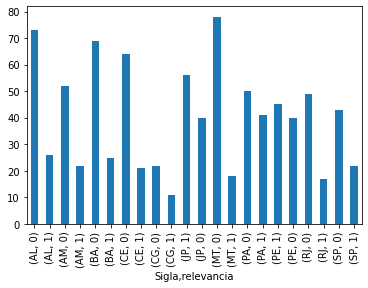

In [501]:
df_limpo.groupby('Sigla')['relevancia'].value_counts().plot(kind='bar')

In [502]:
df_limpo.groupby('relevancia')['texto'].apply(len)

relevancia
0    580
1    304
Name: texto, dtype: int64

In [503]:
rel = df_limpo[df_limpo['relevancia']==1]['texto'].values
irrel = df_limpo[df_limpo['relevancia']==0]['texto'].values

In [504]:
len(rel)

304

In [505]:
len(irrel)

580

In [506]:
def tamanho_medio(strEntrada):
    
    valor = 0
    for strE in strEntrada:
        valor+= len(strE.split())
    return (valor/len(strEntrada))

In [507]:
print('Méida de palavras (tweets relevantes): {}'.format(tamanho_medio(rel)))
print('Méida de palavras (tweets irrelevantes): {}'.format(tamanho_medio(irrel)))

Méida de palavras (tweets relevantes): 11.572368421052632
Méida de palavras (tweets irrelevantes): 17.355172413793102


In [508]:
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize

In [509]:
def tokenizeTweets(strEntrada):
    
    strToken=""
    for strE in strEntrada:
        strToken += strE
    return word_tokenize(strToken)

In [510]:
def contaNgram(strEntrada, num):
    
    token = tokenizeTweets(strEntrada)
    cont = Counter(ngrams(token,num))    
    if num==1:
        cont = {key[0]:value for key, value in cont.items()}
    return cont

In [511]:
cont = contaNgram(rel,1)

In [512]:
unigramas = [(key, value) for (key, value) in sorted(cont.items(),reverse=True, key=lambda x: x[1])]

In [513]:
unigramas[:30]

[('chuva', 215),
 ('de', 133),
 ('e', 107),
 ('a', 76),
 ('que', 63),
 ('em', 54),
 ('do', 52),
 ('o', 45),
 ('com', 45),
 ('eu', 42),
 ('pra', 41),
 ('é', 41),
 ('essa', 39),
 ('da', 36),
 ('um', 32),
 ('não', 31),
 ('no', 29),
 ('na', 29),
 ('frio', 28),
 ('chove', 27),
 ('só', 20),
 ('tá', 20),
 ('aqui', 17),
 ('mas', 17),
 ('se', 17),
 ('uma', 17),
 ('deus', 14),
 ('por', 14),
 ('já', 13),
 ('dia', 13)]

In [514]:
cont = contaNgram(rel, 2)

In [515]:
bigramas = [(key, value) for (key, value) in sorted(cont.items(),reverse=True, key=lambda x: x[1])]

In [516]:
bigramas[:20] 

[(('essa', 'chuva'), 29),
 (('de', 'chuva'), 29),
 (('a', 'chuva'), 22),
 (('chuva', 'e'), 17),
 (('com', 'chuva'), 11),
 (('chuva', 'do'), 11),
 (('e', 'a'), 9),
 (('chuva', 'em'), 8),
 (('chuva', 'de'), 7),
 (('da', 'chuva'), 7),
 (('e', 'essa'), 7),
 (('chuva', 'é'), 7),
 (('na', 'chuva'), 7),
 (('uma', 'chuva'), 7),
 (('e', 'eu'), 7),
 (('chuva', 'mas'), 6),
 (('chuva', 'da'), 6),
 (('nessa', 'chuva'), 5),
 (('que', 'eu'), 5),
 (('do', 'nada'), 5)]

In [517]:
cont = contaNgram(rel, 3)

In [518]:
trigramas = [(key, value) for (key, value) in sorted(cont.items(),reverse=True, key=lambda x: x[1])]

In [519]:
trigramas[:20] 

[(('e', 'essa', 'chuva'), 7),
 (('de', 'chuva', 'e'), 4),
 (('chuva', 'da', 'porra'), 4),
 (('que', 'deus', 'proteja'), 3),
 (('deus', 'proteja', 'os'), 3),
 (('chuva', 'do', 'nada'), 3),
 (('essa', 'chuva', 'do'), 3),
 (('e', 'eu', 'aqui'), 3),
 (('chuva', 'do', 'caju'), 3),
 (('cheirinho', 'de', 'chuva'), 3),
 (('proteja', 'os', 'motoboys'), 2),
 (('os', 'motoboys', 'nessa'), 2),
 (('motoboys', 'nessa', 'chuva'), 2),
 (('de', 'chuva', 'bom'), 2),
 (('bom', 'pra', 'ficar'), 2),
 (('e', 'a', 'internet'), 2),
 (('a', 'chuva', 'mas'), 2),
 (('dias', 'de', 'chuva'), 2),
 (('chuva', 'vento', 'e'), 2),
 (('vento', 'e', 'frio'), 2)]

In [520]:
tokens=tokenizeTweets(rel)

buscaBigramas = nltk.collocations.BigramCollocationFinder.from_words(tokens)

In [521]:
bigramas = nltk.collocations.BigramAssocMeasures()
bigramasPMI = buscaBigramas.score_ngrams(bigramas.pmi)

In [522]:
buscaTrigramas = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [523]:
trigramas = nltk.collocations.TrigramAssocMeasures()
trigramasPMI = buscaTrigramas.score_ngrams(trigramas.pmi)

#### __TF - IDF__

In [524]:
completo = df_limpo['texto'].values

In [525]:
cont = contaNgram(completo,1)

In [526]:
unigramas = [(key, value) for (key, value) in sorted(cont.items(),reverse=True, key=lambda x: x[1])]

In [527]:
unigramas

[('chuva', 678),
 ('de', 525),
 ('e', 374),
 ('a', 332),
 ('que', 307),
 ('o', 249),
 ('é', 181),
 ('em', 164),
 ('eu', 160),
 ('do', 154),
 ('não', 150),
 ('na', 144),
 ('com', 139),
 ('pra', 133),
 ('da', 125),
 ('no', 123),
 ('um', 120),
 ('frio', 114),
 ('uma', 109),
 ('só', 84),
 ('chove', 81),
 ('se', 72),
 ('essa', 71),
 ('mas', 70),
 ('mais', 69),
 ('aqui', 67),
 ('tá', 66),
 ('quando', 60),
 ('me', 60),
 ('por', 56),
 ('tem', 54),
 ('para', 50),
 ('q', 50),
 ('vai', 48),
 ('já', 47),
 ('nem', 45),
 ('os', 44),
 ('as', 43),
 ('esse', 42),
 ('sem', 41),
 ('foi', 39),
 ('minha', 39),
 ('dia', 37),
 ('meu', 37),
 ('hoje', 37),
 ('como', 36),
 ('até', 36),
 ('tempo', 33),
 ('ou', 33),
 ('gente', 32),
 ('pq', 32),
 ('agora', 31),
 ('sol', 31),
 ('deus', 31),
 ('casa', 30),
 ('rt', 30),
 ('nada', 29),
 ('todo', 27),
 ('mesmo', 27),
 ('aí', 27),
 ('tudo', 26),
 ('ser', 26),
 ('muito', 23),
 ('era', 22),
 ('isso', 22),
 ('pode', 22),
 ('dias', 22),
 ('toda', 22),
 ('depois', 21),
 ('be

In [528]:
ind = [index for index, frase in enumerate(completo) if 'frio' in frase]

In [529]:
def tf(frase, termo):
    
    tokens = tokenizeTweets(frase)
    count=0
    for token in tokens:
        if token==termo:
            count+=1
    return count/len(frase)

In [530]:
tf(completo[ind[0]],'frio')

0.004524886877828055

In [531]:
def idf(frases, termo):
    count =0 
    for frase in frases:
        if termo in frase:
            count+=1
    idf = np.log(len(frases)/count)
    return idf
    

In [532]:
idf(completo, 'frio')

2.0222831278398874

In [533]:
idf(completo, 'chuva')

0.12388191279795742

In [534]:
def tokenizeVetor(tweets):
    
    tokens =[]
    for tweet in tweets:
        tokens.append(tweet.split())
    return tokens    

In [535]:
teste = tokenizeVetor(completo)
    
  

In [536]:
teste[:2]

[['se',
  'você',
  'perceber',
  'os',
  'jurados',
  'todos',
  'estão',
  'cantando',
  'músicas',
  'em',
  'português',
  'e',
  'no',
  'primeiro',
  'dia',
  'o',
  'jarbas',
  'tbm',
  'cantou',
  'o',
  'cantando',
  'na',
  'chuva',
  'na',
  'versão',
  'brasileira',
  'então',
  'está',
  'muito',
  'mais',
  'para',
  'um',
  'reflexo',
  'sobre',
  'como',
  'é',
  'o',
  'público',
  'jovem',
  'de',
  'musicais',
  'que',
  'acha',
  'que',
  'apenas',
  'em',
  'inglês',
  'is',
  'good'],
 ['tudo',
  'que',
  'eu',
  'queria',
  'agora',
  'era',
  'uma',
  'chuva',
  'beeeeeeeemmmmm',
  'forte',
  'pelo',
  'resto',
  'da',
  'noite']]

In [541]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer()

def identidade(texto):
    return texto

vectorizer=TfidfVectorizer(tokenizer=identidade, lowercase = False)
tfIdf = vectorizer.fit_transform(teste)
df_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
print (df_tfidf.head(25)) 
#print(vectorizer.get_feature_names())
tfIdfVetor = tfIdf.toarray()

              TF-IDF
cantando    0.345556
o           0.190507
jarbas      0.183254
inglês      0.183254
brasileira  0.183254
português   0.183254
reflexo     0.183254
good        0.183254
versão      0.183254
is          0.183254
jurados     0.183254
musicais    0.183254
músicas     0.172778
cantou      0.172778
perceber    0.172778
jovem       0.165345
público     0.159579
primeiro    0.159579
apenas      0.154868
acha        0.150885
tbm         0.150885
na          0.149614
estão       0.147435
em          0.146963
todos       0.141670


In [544]:
mask = df_limpo['relevancia'].astype(bool).values
rel_centroid = tfIdfVetor[mask].mean(axis=0)
irrel_centroid = tfIdfVetor[~mask].mean(axis=0)

In [546]:
vectorizer.transform(['nova', 'frase'])

<2x2990 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [548]:
vectorizer.get_feature_names()

['&lt',
 '//',
 'a',
 'abafado/calor',
 'abaixo',
 'abandono',
 'abandonou',
 'abastecer',
 'abdominal',
 'abelhas',
 'abençoar',
 'aberta',
 'abismos',
 'abortinho',
 'abraça',
 'abraçaram',
 'abraço',
 'abre',
 'abrem',
 'abriga',
 'abril',
 'abrir',
 'absurdo',
 'abundância',
 'acaba',
 'acabado',
 'acabando',
 'acabar',
 'acabasse',
 'acabei',
 'acabou',
 'academia',
 'aceite',
 'aceito',
 'acenderam',
 'acentuam',
 'acervo',
 'acha',
 'achando',
 'achar',
 'achei',
 'acho',
 'achou',
 'acima',
 'acinzentado',
 'acnh',
 'acompanhada',
 'acompanho',
 'acontece',
 'acontecendo',
 'acontecer',
 'aconteceria',
 'aconteceu',
 'acontecido',
 'acordada',
 'acordar',
 'acordei',
 'acordo',
 'acordou',
 'acostumado',
 'acredita',
 'acreditar',
 'acreditei',
 'acréscimos',
 'adesivo',
 'adiado',
 'adianta',
 'adivinhando',
 'adorei',
 'af',
 'afeta',
 'aff',
 'afim',
 'afinal',
 'aflita',
 'afunda',
 'agarrada',
 'agarradinha',
 'agasalho',
 'agitar',
 'aglomerando',
 'aglomerar',
 'agonia',

In [550]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [601]:
y = df_limpo['relevancia'].values
X = tfIdf.toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, stratify = y) 

In [602]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [603]:
y_pred = clf.predict(X_test)

In [604]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [605]:
precision_score(y_pred, y_test)

0.03755868544600939

In [606]:
accuracy_score(y_pred, y_test)

0.6655896607431341

In [594]:
confusion_matrix(y_pred, y_test)

array([[404, 204],
       [  2,   9]])

In [607]:
from sklearn.svm import SVC


clf_svc = SVC()
clf_svc.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [608]:
y_pred = clf_svc.predict(X_test)

In [609]:
precision_score(y_pred, y_test)

0.07511737089201878

In [610]:
accuracy_score(y_pred, y_test)

0.6752827140549273

In [611]:
confusion_matrix(y_pred, y_test)

array([[402, 197],
       [  4,  16]])

In [615]:
from sklearn.ensemble import RandomForestClassifier

clf_tree = RandomForestClassifier()
clf_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [616]:
y_pred = clf_tree.predict(X_test)

In [617]:
precision_score(y_pred, y_test)

0.2300469483568075

In [618]:
accuracy_score(y_pred, y_test)

0.7011308562197092

In [619]:
confusion_matrix(y_pred, y_test)

array([[385, 164],
       [ 21,  49]])

In [654]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [655]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [661]:
clf_tree_scaled = RandomForestClassifier(random_state=7)
clf_tree_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [662]:
y_pred = clf_tree_scaled.predict(X_test_scaled)

In [663]:
precision_score(y_pred, y_test)

0.2347417840375587

In [664]:
accuracy_score(y_pred, y_test)

0.6978998384491115

In [665]:
confusion_matrix(y_pred, y_test)

array([[382, 163],
       [ 24,  50]])

In [670]:
novasFrases = [['não', 'esta', 'chovendo'],['chove', 'muito'],['gosto', 'de', 'chuva']]

In [671]:
x_valid = vectorizer.transform(novasFrases)
x_valid = x_valid.todense()
x_valid_scaled = scaler.transform(x_valid)

In [672]:
x_valid.shape

(3, 2990)

In [673]:
clf_tree.predict(x_valid)

array([0, 0, 0])